# 🛳 Titanic Survival Prediction using Voting Ensemble Learning

This project applies **Voting Classifier Ensemble Learning** on the Titanic dataset to predict survival.  
We use three base models — **Logistic Regression, K-Nearest Neighbors, and Support Vector Classifier** — and then combine them using **Hard Voting, Soft Voting, and Weighted Voting**.

## 📂 Dataset
We use the [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic) dataset from Kaggle.  

The dataset contains information about Titanic passengers such as age, sex, passenger class, and survival status.


## 📚 Importing Libraries

We start by importing all the required Python libraries for data manipulation, visualization, preprocessing, and machine learning.  
Warnings are suppressed for cleaner output.


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



# Disabling warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


## 📂 Loading the Dataset

We read the Titanic dataset (`train.csv`) and display the first few rows to understand its structure.


In [2]:
# Reading the dataset 
file_path = r"Titanic Dataset/train.csv"
df_train = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## ℹ️ Dataset Information

We check the dataset info to see column names, data types, and missing values.


In [3]:
# Getting a summary of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 📊 Statistical Summary

We generate descriptive statistics (mean, median, standard deviation, etc.) for numerical columns.

In [4]:
# Getting statistical summary of the dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 🧹 Dropping Unnecessary Columns

Columns such as `PassengerId`, `Name`, `Ticket`, and `Cabin` are not useful for prediction, so we remove them.


In [5]:
# Removing the unnecessary columns:

df_train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Displaying the first few rows of the modified dataset
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 🔍 Checking Missing Values

We check for missing values in the dataset to decide how to handle them.


In [6]:
# Checking for missing values
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## 🛠 Handling Missing Values

- Missing **Age** values are filled with the median age grouped by `Pclass` and `Sex`.  
- Missing **Embarked** values are filled with the mode.  

This ensures that no missing values remain.


In [7]:
# Filling `Age` column
df_train["Age"] = df_train["Age"].fillna(
    df_train.groupby(["Pclass", "Sex"])["Age"].transform("median")
)

# Filling ``Embarked`` column with mode
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

# Printing New missing values
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 📈 Data Visualization

We use Seaborn's pairplot to visualize feature relationships and see how survival is distributed across variables.


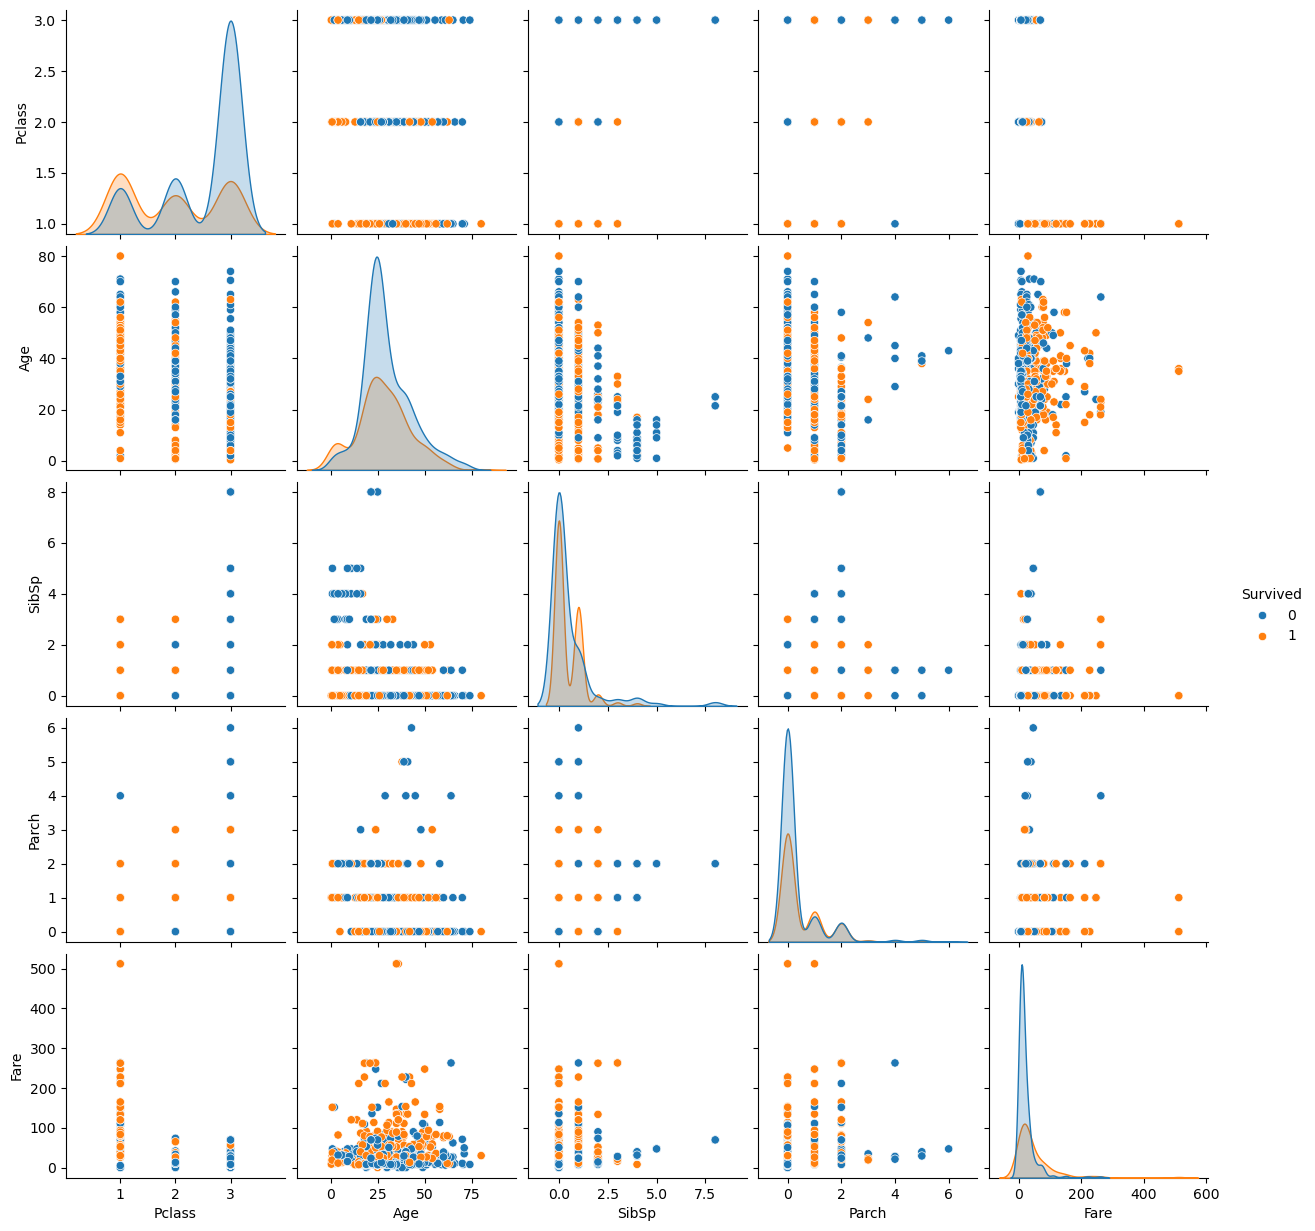

In [8]:
# Visualizing pairplot to understand relationships
sns.pairplot(df_train,hue='Survived')

## 🔄 Encoding Categorical Features

Categorical variables (`Sex`, `Embarked`) are converted into numeric form using **One-Hot Encoding**.


In [9]:
# One-Hot Encoding for categorical columns
df_train = pd.get_dummies(df_train,columns=['Sex', 'Embarked'])
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


## ✂️ Splitting Data & Scaling

- Features (`X`) and target (`y = Survived`) are separated.  
- StandardScaler is applied to normalize the feature values for better model performance.


In [10]:
# Splitting the dataset into features and target variable
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

# Scale Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## ⚙️ Model Creation

We create three base classifiers:  
- Logistic Regression  
- K-Nearest Neighbors (k=5)  
- Support Vector Classifier (with probability=True for soft voting)  

These models will later be combined using a **Voting Classifier**.


In [11]:
# Creating Objects for classifiers
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(probability=True)

estimators = [('lr',logreg),('knn',knn),('svc',svc)]

## 📌 Evaluating Individual Models

We perform **10-fold Cross Validation** on each model and record their mean accuracy scores.


In [12]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X_scaled,y,cv=10,scoring='accuracy')
    print(f"{estimator[0]}: {np.round(np.mean(x),2)}")

lr: 0.8
knn: 0.83
svc: 0.82


## 🗳 Hard Voting Classifier

We combine the three classifiers using **Hard Voting** (majority rule).  
Accuracy is evaluated using 10-fold Cross Validation.


In [13]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X_scaled,y,cv=10,scoring='accuracy')
print(f"Accuracy: {(np.round(np.mean(x),2))}")

Accuracy: 0.83


## 🗳 Soft Voting Classifier

We use **Soft Voting**, where class probabilities are averaged before choosing the predicted class.  
This often works better when models are well-calibrated.


In [14]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X_scaled,y,cv=10,scoring='accuracy')
print(f"Accuracy: {(np.round(np.mean(x),2))}")

Accuracy: 0.82


## ⚖️ Weighted Voting Classifier

We experiment with different weights `[i, j, k]` for Logistic Regression, KNN, and SVC respectively.  
The goal is to see if giving more importance to a stronger model (like SVC) improves accuracy.


In [15]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='hard',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.75
for i=1,j=1,k=2 0.7
for i=1,j=1,k=3 0.68
for i=1,j=2,k=1 0.73
for i=1,j=2,k=2 0.75
for i=1,j=2,k=3 0.7
for i=1,j=3,k=1 0.7
for i=1,j=3,k=2 0.73
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.75
for i=2,j=1,k=2 0.75
for i=2,j=1,k=3 0.7
for i=2,j=2,k=1 0.75
for i=2,j=2,k=2 0.75
for i=2,j=2,k=3 0.75
for i=2,j=3,k=1 0.73
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.75
for i=3,j=1,k=3 0.75
for i=3,j=2,k=1 0.75
for i=3,j=2,k=2 0.75
for i=3,j=2,k=3 0.75
for i=3,j=3,k=1 0.75
for i=3,j=3,k=2 0.75
for i=3,j=3,k=3 0.75


## 🌍 Visualizing Decision Boundaries

Since the Titanic dataset has many features, we use **Principal Component Analysis (PCA)** to reduce the data to **2 dimensions** for visualization.  
This allows us to plot the **decision boundaries** of different classifiers in 2D space.  

- Logistic Regression  
- KNN (k=5)  
- Support Vector Classifier  
- Voting Classifier (Hard Voting)  

The plots show how each model separates the survival classes.  
Red points = **Did Not Survive (0)**  
Green points = **Survived (1)**  


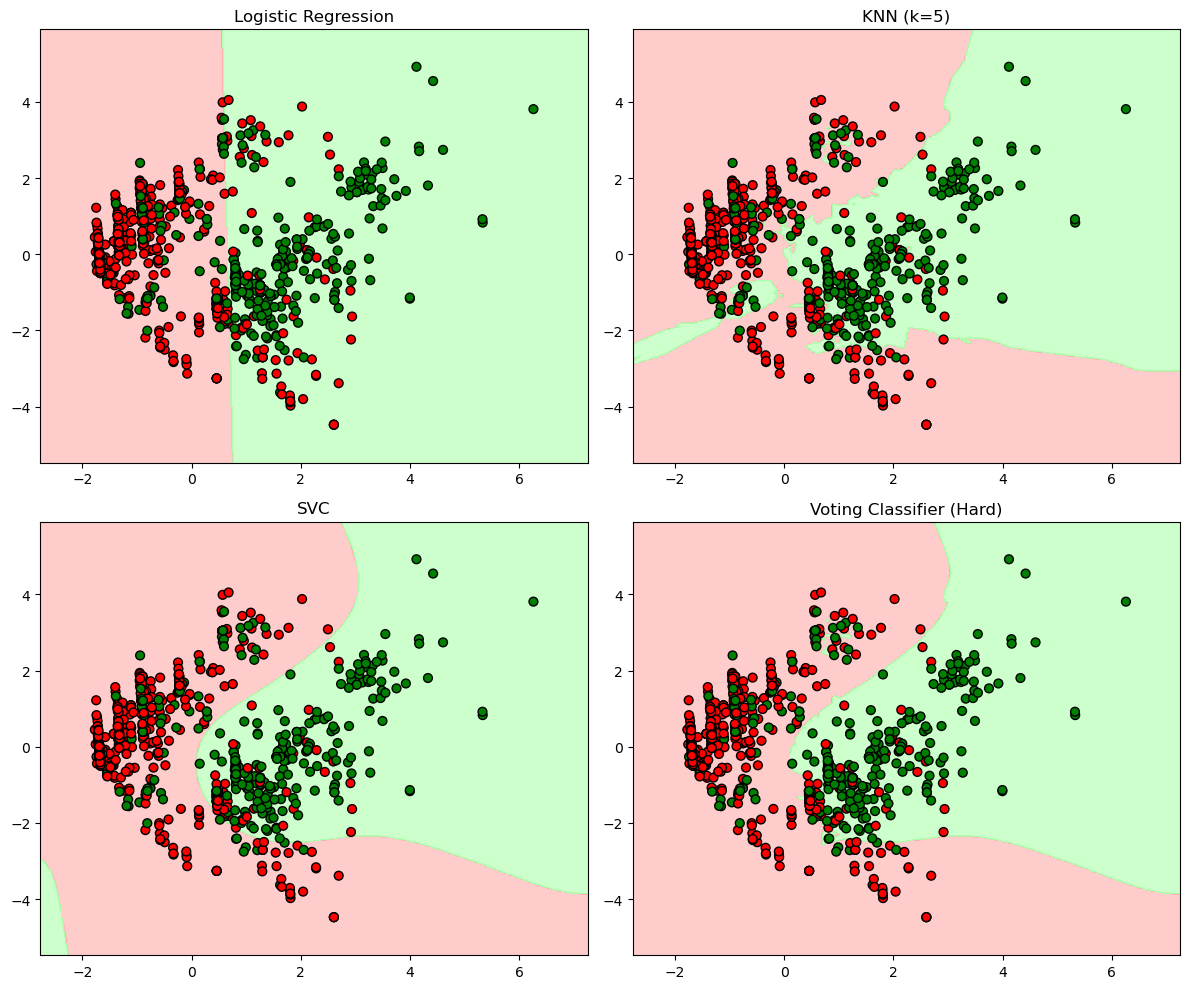

In [16]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Re-train models on 2D PCA data
logreg.fit(X_pca, y)
knn.fit(X_pca, y)
svc.fit(X_pca, y)
vc_hard = VotingClassifier(estimators=estimators, voting='hard').fit(X_pca, y)

models = {
    "Logistic Regression": logreg,
    "KNN (k=5)": knn,
    "SVC": svc,
    "Voting Classifier (Hard)": vc_hard
}

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ['red', 'green']

    h = .02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=40)
    ax.set_title(title)

# Plot all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, model) in zip(axes.ravel(), models.items()):
    plot_decision_boundary(model, X_pca, y, ax, name)

plt.tight_layout()
plt.show()


# ✅ Results & Conclusion

### 📊 Accuracy Scores
- Logistic Regression: **0.80**  
- KNN (k=5): **0.83**  
- SVC: **0.82**  
- Hard Voting: **0.83**  
- Soft Voting: **0.83**  
- Weighted Voting (best ~0.825 when SVC weight is higher)  

### 🔎 Interpretation
- SVC is the strongest individual model.  
- Hard and Soft Voting both achieved the same accuracy as KNN (83%).  
- Weighted Voting did not improve accuracy; too much emphasis on weaker models reduced performance. 